## Insurance Forcasting
**Author: Aadarsh Agarwal**

### Overview

1. Dataset
2. Aim
3. Approach
4. Expolratory Data Analysis
5. Feature Engineering
6. Modelling
 * Independent and Dependent variables
 * Test Train Split
 * Multiple Linear Regression Model
7. Evaluation
8. Conclusion

### About Dataset

Link: https://www.kaggle.com/datasets/mirichoi0218/insurance

The dataset has been taken from _kaggle_ from the source link mentioned above. The _csv_ file contains the details in the following columns.

**Columns:**

1. _age:_ age of primary beneficiary
1. _sex:_ insurance contractor gender, female, male
1. _bmi:_ Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight ($kg/m^2$) using the ratio of height to weight, ideally 18.5 to 24.9
1. _children:_ Number of children covered by health insurance / Number of dependents
1. _smoker:_ Smoking
1. _region:_ the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
1. _charges:_ Individual medical costs billed by health insurance

### Aim:

To accurately predict insurance costs.

### Approach

If we observe the columns, it is clear that age, sex, bmi, children, smoker and region columns form the features of our dataset and charges column is our target variable. Let us begin by loading the dataset and observe various statistics about our dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The key observations that can be made from the dataset above:

* We have 4 numerical and 3 categorical variables.
* We have $1338$ rows of data.
* Another important thing to be noticed here is that there are no null values in our dataset (Hence, no cleaning is required).

### Exploratory Data Analysis

Let us begin by describing the numerical variables of our dataset.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### Plotting the Correlation Matrix

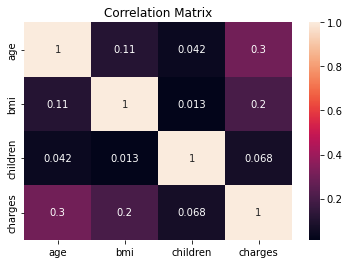

In [6]:
import seaborn as sns
ax = sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Since there is not much correlation between features, we can observe our data by analyzing each feature one by one

#### Age

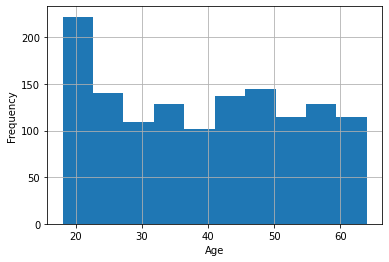

In [7]:
df['age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Sex

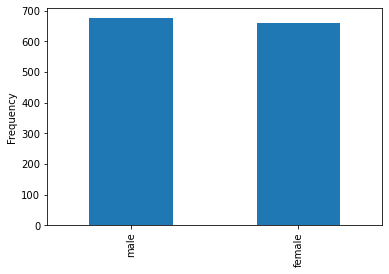

In [8]:
df['sex'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

As observed the frequency of both the genders is almost the same, i.e., uniformly distributed.

#### BMI

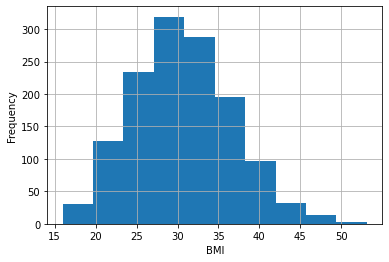

In [10]:
df['bmi'].hist()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

The distribution looks approximately normal (a bit right skewed).

#### Children

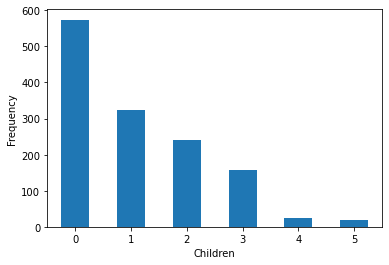

In [11]:
df['children'].value_counts().plot(kind='bar')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.show()

As observed in real world, here also, the number of people with more children decreases as number of children increases.

#### Smoker

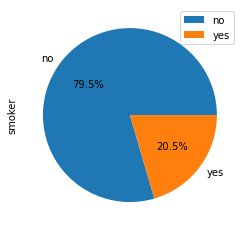

In [12]:
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend()
plt.show()

Around $80\%$ of our population is non smoker.

#### Region

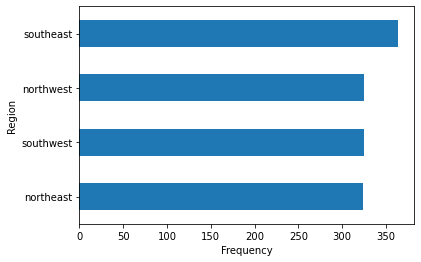

In [13]:
df['region'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Region')
plt.xticks(rotation='horizontal')
plt.show()

#### Charges

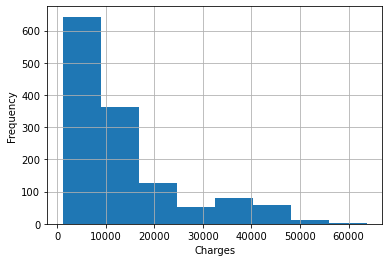

In [14]:
df['charges'].hist(bins=8)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Now that we have visualized all our data, we can move on to feature engineering.

### Feature Engineering

We have 3 categorical variables, namely, **sex**, **smoker** and **region**. The first two have binary values and hence label enconding can be used for them. For **region**, we will be using one-hot encoding. From here on I will be using a new copy of dataset, thereby retaining the original one.

In [15]:
df1=df.copy()

#### Label Encoding

The code below changes **male** to 1 and **female** to 0 in **sex** column. It also changes **yes** to 1 and **no** to 0 in **smoker** column.

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['sex'] = label_encoder.fit_transform(df['sex'])
df1['smoker'] = label_encoder.fit_transform(df['smoker'])

In [17]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


#### One-Hot Encoding
The code below makes 4 new columns with individual areas and fills them with the truth value($1$) of the **region** column.

In [18]:
df1=pd.concat([df1,pd.get_dummies(df1['region'],drop_first=False)],axis=1)

In [19]:
df1.drop('region',axis=1,inplace=True)
lc=df1.pop('charges')
df1.insert(len(df1.columns), 'charges', lc)

In [20]:
df1

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0,10600.54830
1334,18,0,31.920,0,0,1,0,0,0,2205.98080
1335,18,0,36.850,0,0,0,0,1,0,1629.83350
1336,21,0,25.800,0,0,0,0,0,1,2007.94500


Now that we are done with the complete preprocessing part of the procedure, we can move onto the modelling portion of our work.

### Modelling

#### Independent and Dependent variables
We convert our dataframe into two arrays, one for features(independent) and other for target(dependent), namely _X_ and _y_ respectively.

In [21]:
X=df1.iloc[:,0:(len(df1.columns)-1)].values
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]])

In [22]:
y=df1.iloc[:,-1].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

#### Test Train Split
We split our transformed data set into two portions, one for training our **Multiple Linear Regression** model later on and another to test the accuracy of our model.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X_train.shape

(936, 9)

#### Multiple Linear Regression
Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Multiple regression is an extension of linear (OLS) regression that uses just one explanatory variable.

In [25]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
y_pred =  LR.predict(X_test)

### Evaluation

We will be using the $R2$ score to evaluation our model. In statistics, the coefficient of determination, denoted R² or r² and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable.

$$R^2 = 1 - \dfrac{RSS}{TSS}$$

$R^2$	=	coefficient of determination <br>
**RSS**	=	sum of squares of residuals <br>
**TSS**	=	total sum of squares


In [26]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('R2 score is',score)

R2 score is 0.7696118054369008


### Conclusion

Since the accuracy of our model is about $77\%$, we can use this model for our problem of insurance forecasting.